# Remaining Plots using matplotlib and seaborn:

#### QQ plot: Quantile- Quantile.
* Does my data follow a specific theoretical distribution (usually Normal)?
* in this points lie on a straight 45 degree line.
* Deviation from line: non normality
* usually it is called that histogram lie but QQ plot doesnot. 
* if the points lie close to a straight diagonal line that means data is approximately normally distributed and if they deviate from line it is not normal.
* it is used when you want to check that is my data normally distributed, can i apply t-test , annova test, linear regression, are there heavy tails or outliers, are residuals behaving correctly?
* Requirements to use a Q–Q plot You need:
    * Numerical (continuous) data
    * Reasonable sample size (small works, but bigger is better)
    * A reference distribution (commonly normal)
* Not suitable for:
    * Categorical data
    * Binary data
    * Very small discrete datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import scipy.stats as stats

In [2]:
tip=sns.load_dataset("tips")
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


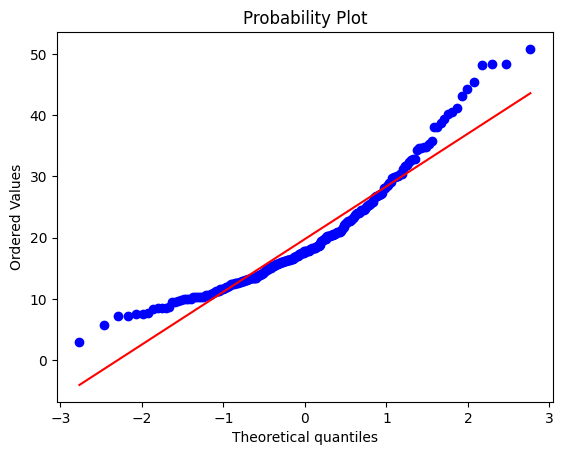

In [4]:
stats.probplot(tip['total_bill'],dist='norm',plot=plt)
plt.show()

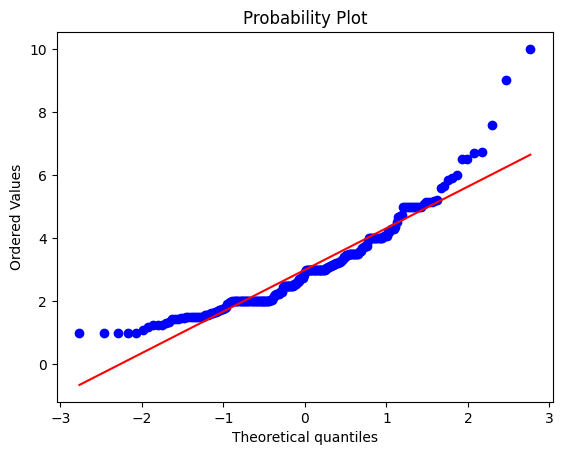

In [5]:
stats.probplot(tip['tip'],dist='norm',plot=plt)
plt.show()

also check with other datasets:

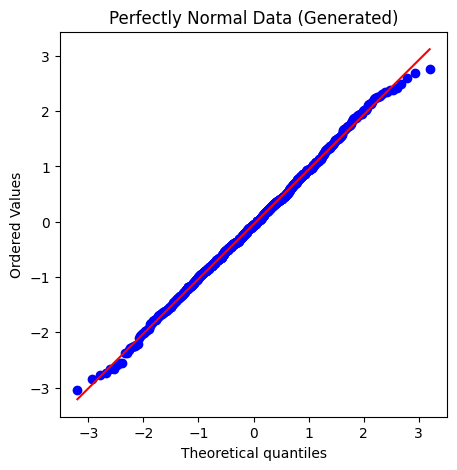

In [11]:
# perfectly normal. All points lie almost exactly on a straight line data follows normal distribution.
np.random.seed(0)
perfect_normal = np.random.normal(loc=0, scale=1, size=1000)

plt.figure(figsize=(5,5))
stats.probplot(perfect_normal, dist="norm", plot=plt)
plt.title("Perfectly Normal Data (Generated)")
plt.show()

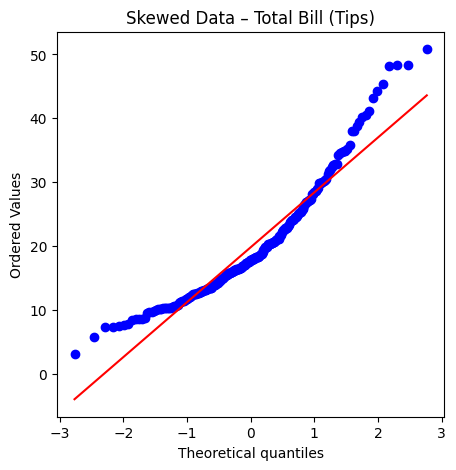

In [14]:
# s shaped curve: middle near line and ends curved
plt.figure(figsize=(5,5))
stats.probplot(tip['total_bill'], dist="norm", plot=plt)
plt.title("Skewed Data – Total Bill (Tips)")
plt.show()

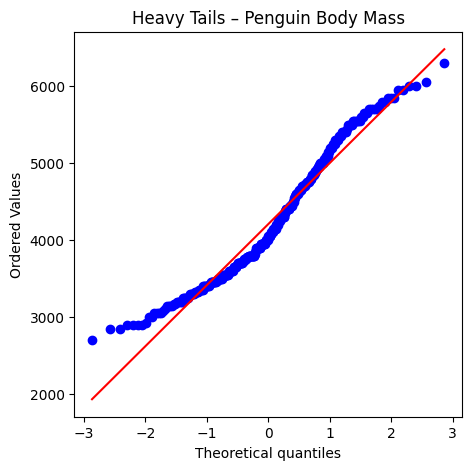

In [9]:
# heavy tails outliers present ends bends away strongly and middle is straight
penguins = sns.load_dataset("penguins").dropna()

plt.figure(figsize=(5,5))
stats.probplot(penguins['body_mass_g'], dist="norm", plot=plt)
plt.title("Heavy Tails – Penguin Body Mass")
plt.show()


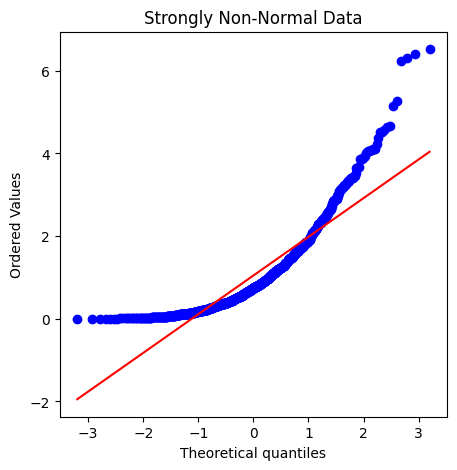

In [10]:
# strong deviation from line data not normal at all.
non_normal = np.random.exponential(scale=1, size=1000)

plt.figure(figsize=(5,5))
stats.probplot(non_normal, dist="norm", plot=plt)
plt.title("Strongly Non-Normal Data")
plt.show()


## How to story tell in your plot for better interactivity?
Every visualization should answer 3 questions:
1. What is happening?
2. Why is it happening?
3. Why should I care?
------------------
your picture shows good title, annotation, start with zero for y-axis and x-axis, and good captions.

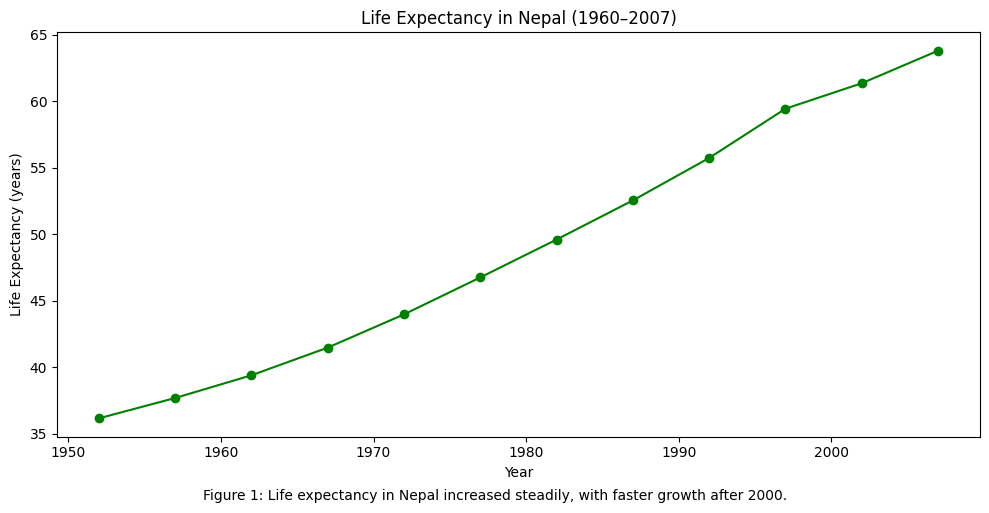

In [21]:
df = px.data.gapminder()
nepal = df[df['country'] == 'Nepal']

plt.figure(figsize=(10,5))
plt.plot(nepal['year'], nepal['lifeExp'], marker='o', color='green')

plt.title("Life Expectancy in Nepal (1960–2007)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")

# Caption
plt.figtext(
    0.5, -0.01,
    "Figure 1: Life expectancy in Nepal increased steadily, with faster growth after 2000.",
    ha='center', fontsize=10
)

plt.tight_layout()
plt.show()